# Problem Statement

Customer Churn is a burning problem for Telecom companies. Almost every telecom company pays a premium to get a customer on-board. Customer churn directly impacts company’s revenue.
  
In this case-study, we simulate one such case of customer churn where we work on a data of post-paid customers with a contract. The data has information about customer usage behaviour, contract details, and payment details. The data also indicates which were the customers who cancelled their service.  
  
Based on this past data, Perform an EDA and build a model which can predict whether a customer will cancel their service in the future or not.

# Data Dictionary

* <b>Churn</b> - 1 if customer cancelled service, 0 if not
* <b>AccountWeeks</b> - number of weeks customer has had active account
* <b>ContractRenewal</b> - 1 if customer recently renewed contract, 0 if not
* <b>DataPlan</b> - 1 if customer has data plan, 0 if not
* <b>DataUsage</b> - gigabytes of monthly data usage
* <b>CustServCalls</b> - number of calls into customer service
* <b>DayMins</b> - average daytime minutes per month
* <b>DayCalls</b> - average number of daytime calls
* <b>MonthlyCharge</b> - average monthly bill
* <b>OverageFee</b> - largest overage fee in last 12 months
* <b>RoamMins</b> - average number of roaming minutes


In [1]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [2]:
cell_df = pd.read_excel("Cellphone.xlsx")

## EDA

In [3]:
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [4]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3303 non-null   float64
 2   ContractRenewal  3315 non-null   float64
 3   DataPlan         3324 non-null   float64
 4   DataUsage        3317 non-null   float64
 5   CustServCalls    3281 non-null   float64
 6   DayMins          3298 non-null   float64
 7   DayCalls         3322 non-null   float64
 8   MonthlyCharge    3320 non-null   float64
 9   OverageFee       3309 non-null   float64
 10  RoamMins         3326 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 286.6 KB


There are missing values in some coumns.  
All variables are of numeric type and does not contain any data inconsistencies (causing numeric variables to be object due to some special characters present in the data).  
Churn is the target variable.   
Churn, ContractRenewal and DataPlan are binary variables.

In [5]:
cell_df[['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']].describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3303.000000,3317.000000,3281.000000,3298.000000,3322.000000,3320.000000,3309.000000,3326.000000
mean,101.159552,0.814827,1.563852,179.863069,100.434377,56.288735,10.048598,10.237974
std,39.879736,1.270329,1.318590,54.581440,20.079248,16.438343,2.539063,2.793192
min,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,0.000000,1.000000,179.600000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.780000,2.000000,216.700000,114.000000,66.125000,11.770000,12.100000
max,243.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


### Check for Missing values

In [6]:
cell_df.shape

(3333, 11)

In [7]:
cell_df.isnull().sum()

Churn               0
AccountWeeks       30
ContractRenewal    18
DataPlan            9
DataUsage          16
CustServCalls      52
DayMins            35
DayCalls           11
MonthlyCharge      13
OverageFee         24
RoamMins            7
dtype: int64

In [8]:
cell_df.isnull().sum().sum()

215

In [9]:
cell_df.isnull().sum().sum()/cell_df.shape[0]

0.06450645064506451

### Imputing missing values

Since, ContractRenewal and DataPlan are binary, we cannot substitute with mean values for these 2 variables. We will impute these two variables with their respective modal values.

In [10]:
cols = ['ContractRenewal','DataPlan']
for column in cols:
    print(column)
    mode_1 = cell_df[column].mode()[0]
    print(mode_1)
    cell_df[column].fillna(value=mode_1,inplace=True)
    
cell_df.isnull().sum()

ContractRenewal
1.0
DataPlan
0.0


Churn               0
AccountWeeks       30
ContractRenewal     0
DataPlan            0
DataUsage          16
CustServCalls      52
DayMins            35
DayCalls           11
MonthlyCharge      13
OverageFee         24
RoamMins            7
dtype: int64

Now let us impute the rest of the continuous variables with the median. For that we are going to use the SimpleImputer sub module from sklearn.

In [11]:
for col in cell_df.columns:
    if col not in cell_df['ContractRenewal'] or cell_df['DataPlan']:
        median = cell_df[col].median()
        cell_df[col] = cell_df[col].fillna(median)

cell_df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
SI = SimpleImputer(strategy='median')

In [14]:
cell_df = pd.DataFrame(SI.fit_transform(cell_df),columns=cell_df.columns)

In [15]:
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1.0,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0.0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0.0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0.0,80.0,1.0,1.0,2.89,4.0,166.4,92.0,77.9,11.92,10.7
4,0.0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [81]:
cell_df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### Checking for Duplicates

In [13]:
# Are there any duplicates ?
dups = cell_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Proportion in the Target classes

In [14]:
cell_df.Churn.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

### Distribution of the variables Check

In [15]:
from pylab import rcParams

In [16]:
rcParams['figure.figsize'] = 10,8

In [17]:
l = ['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']

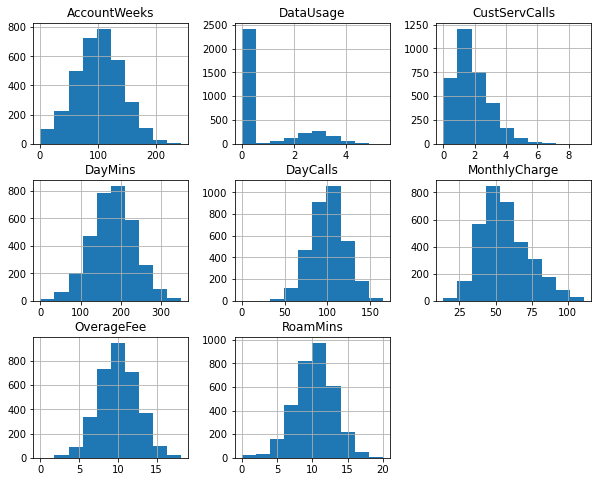

In [18]:
cell_df[l].hist();

### Outlier Checks

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


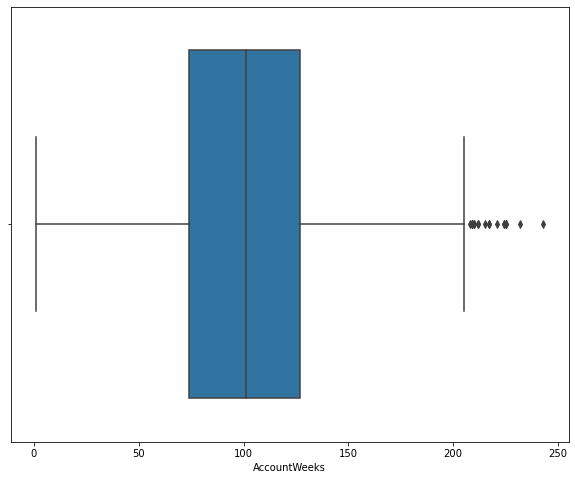

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


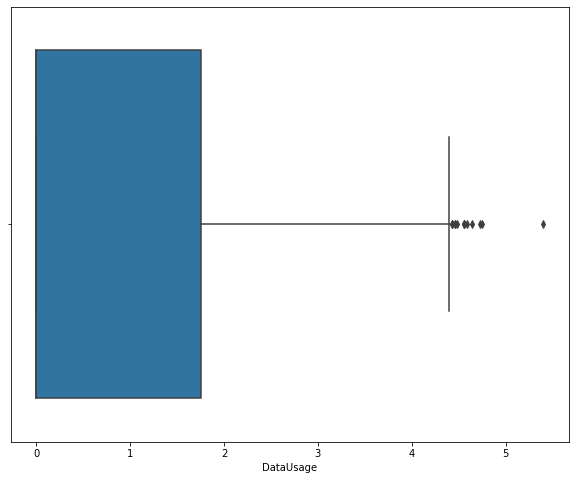

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


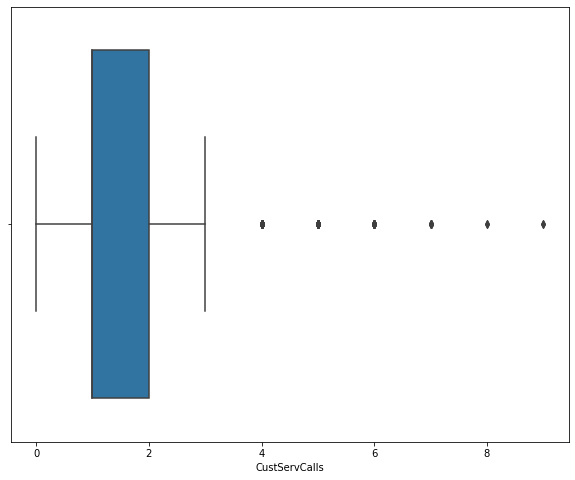

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


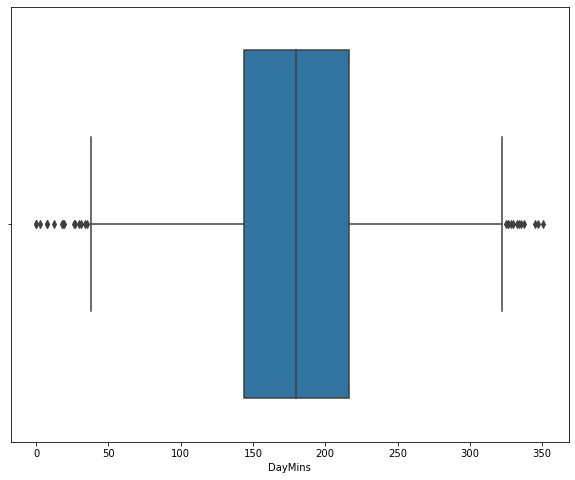

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


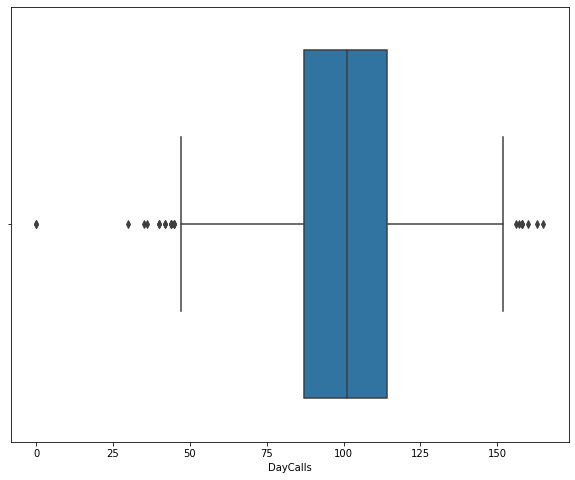

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


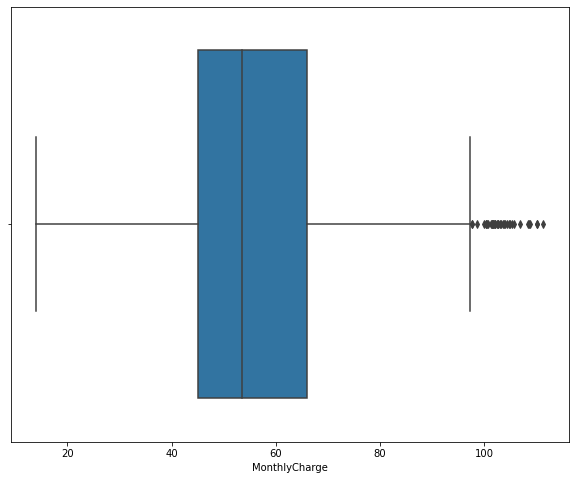

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


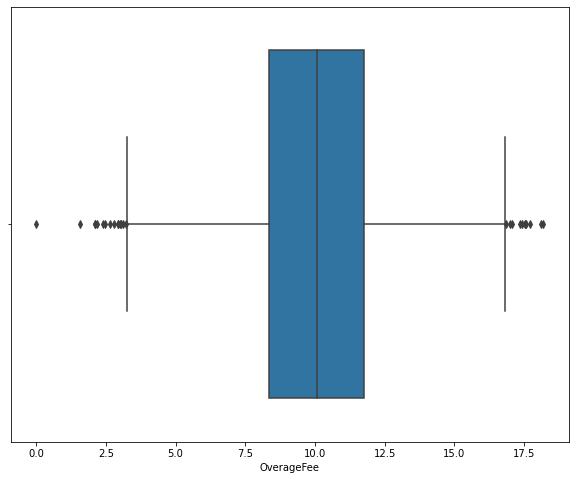

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


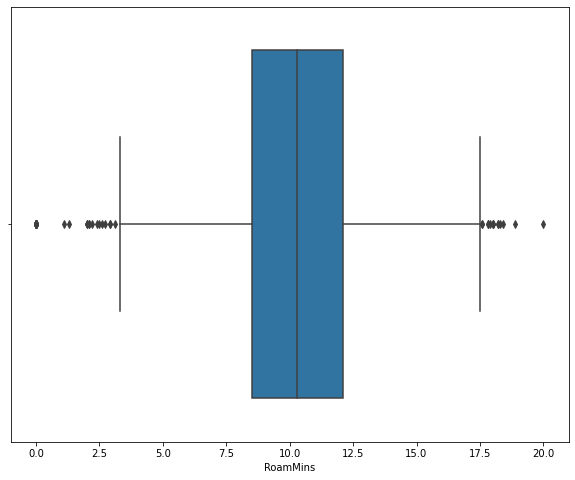

In [19]:
cols=['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins'];

for i in cols:
    sns.boxplot(cell_df[i])
    plt.show()


Although outliers exists as per the boxplot, by looking at the data distribution in describe(), the values are not too far away. 
Treating the outliers by converting them to min/max values will cause most variables to have values to be the same. So, outliers are not treated in this case

### Bi-Variate Analysis with Target variable

<b>Account Weeks and Churn</b>

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


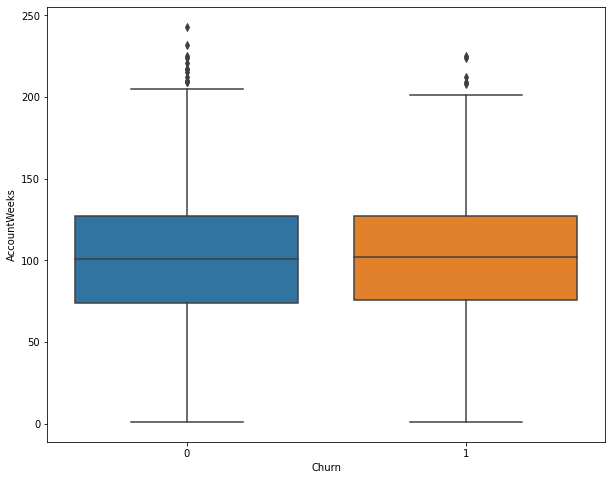

In [20]:
sns.boxplot(cell_df['Churn'],cell_df['AccountWeeks']);

AccountWeeks shows similar distribution between churn and no churn, and is normally distributed

<b>Data Usage against Churn</b>

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


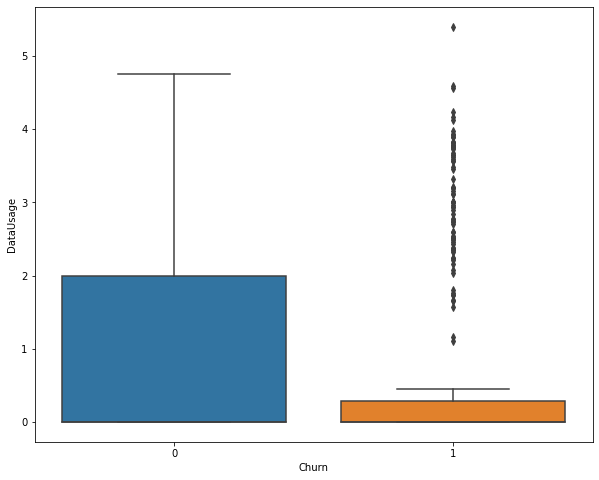

In [21]:
sns.boxplot(cell_df['Churn'],cell_df['DataUsage']);

DataUsage shows clear distinction between churn and no churn. Customers who has not churned shows a wider distribution indicating more data usage. Whereas customers who has churned has smaller distribution (mostly near data usage 0) with many outliers indicating few customers who has more data usage still has churned

<b>DayMins against Churn</b>

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


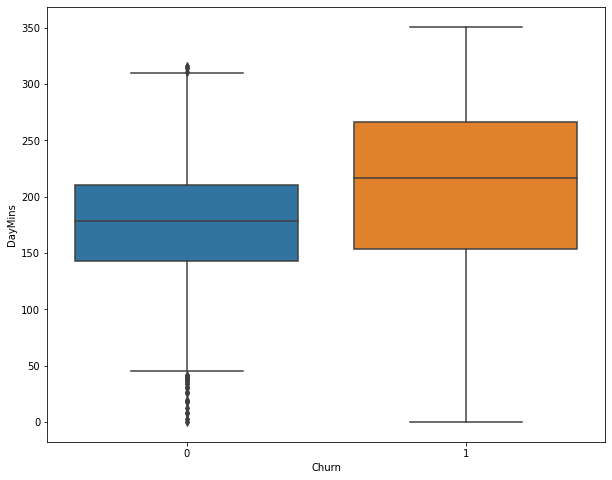

In [22]:
sns.boxplot(cell_df['Churn'],cell_df['DayMins']);

DayMins shows distinction between churn and no churn, and both are normally distributed with little skewness. Distribution is much wider for churn than no churn

<b>DayCalls against Churn</b>

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


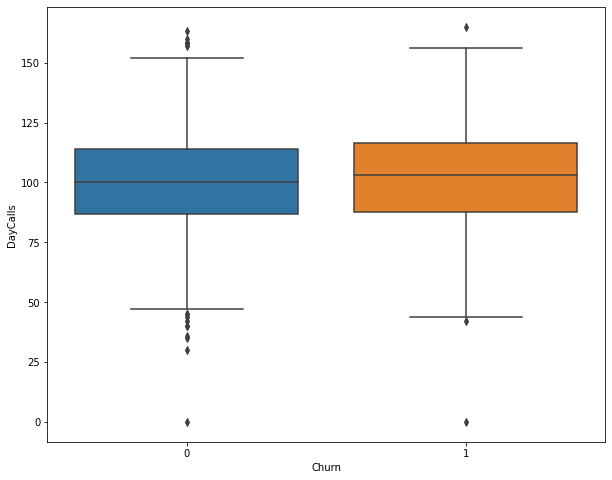

In [23]:
sns.boxplot(cell_df['Churn'],cell_df['DayCalls']);

DayCalls shows similar distribution between churn and no churn, and is normally distributed

<b>MonthlyCharge against Churn</b>

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


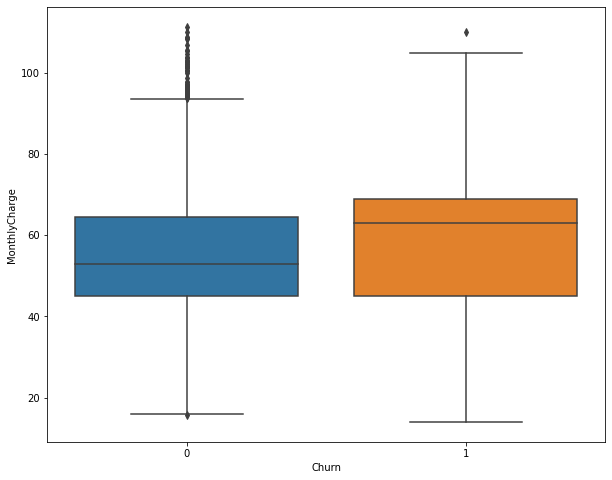

In [24]:
sns.boxplot(cell_df['Churn'],cell_df['MonthlyCharge']);

MonthlyCharge shows some skewness in the distribution between churn and no churn. Distribution is much wider for churn indicating more monthly charge means more churn. Median of churn is higher than no churn

<b>OverageFee against Churn</b>

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


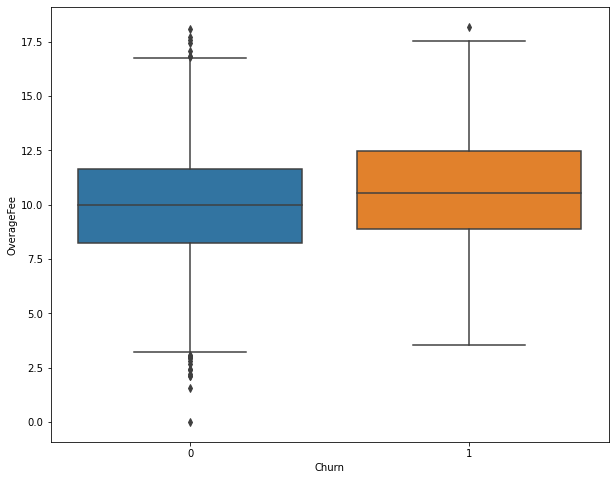

In [25]:
sns.boxplot(cell_df['Churn'],cell_df['OverageFee']);

Distribution is almost similar between churn and no churn

<b>RoamMins against Churn</b>

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


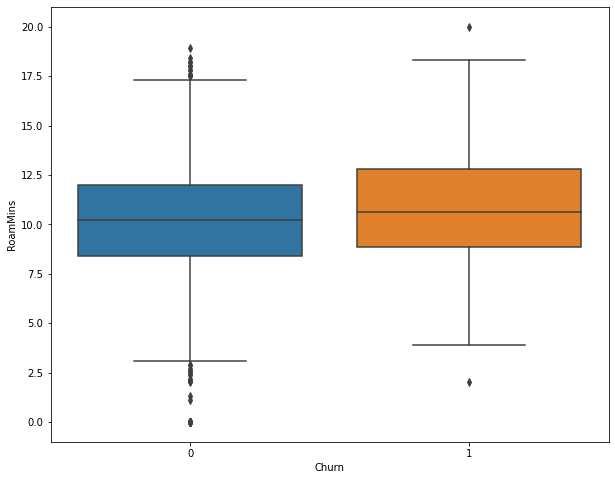

In [26]:
sns.boxplot(cell_df['Churn'],cell_df['RoamMins']);

Distribution is almost similar between churn and no churn. Medians are almost same

<b>CustServCalls against Churn</b>

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


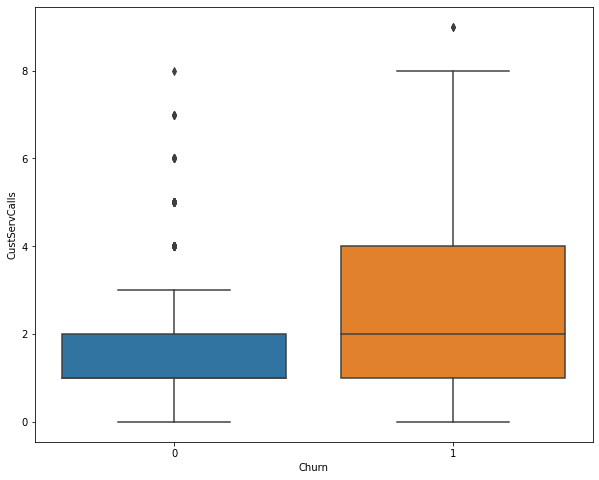

In [27]:
sns.boxplot(cell_df['Churn'],cell_df['CustServCalls']);

Distribution much wider for churn and lesser for no churn. More CustServCalls indicates more churn.

<b>Contract Renewal against Churn</b>

In [29]:
cell_df['ContractRenewal'].value_counts()

1.0    3011
0.0     322
Name: ContractRenewal, dtype: int64

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


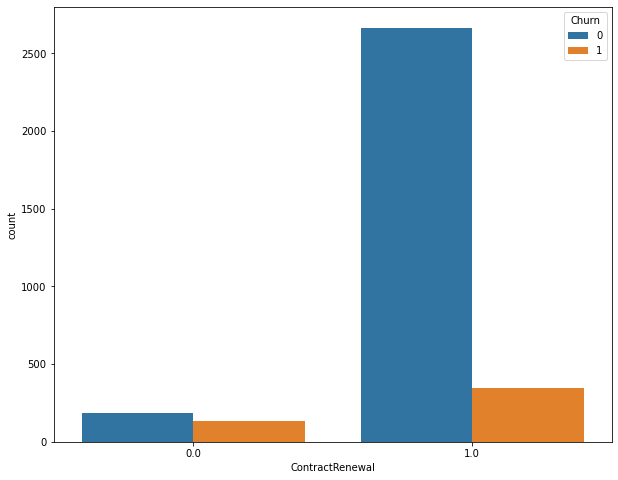

In [28]:
sns.countplot(cell_df['ContractRenewal'],hue=cell_df['Churn']);

The contract renewal is totally opposite to the churn as the churn value of 0 shows that the user not cancelled the service whereas the contract renewal of value 0 shows that user has not renewed the contract.  
When customers has not renewed the contract, count of churn and no churn is almost same.  
More customers who has renewed the contract has not churned.

<b>Data Plan against Churn</b>

In [31]:
cell_df['DataPlan'].value_counts()

0.0    2414
1.0     919
Name: DataPlan, dtype: int64

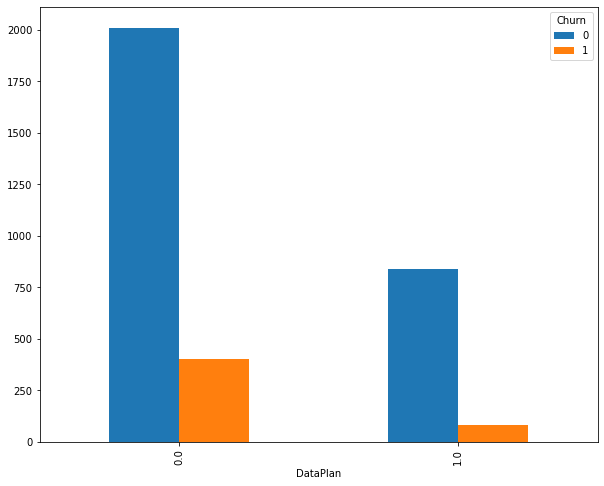

In [30]:
pd.crosstab(cell_df['DataPlan'],cell_df['Churn']).plot(kind='bar');

In [104]:
100/800

0.125

In [106]:
400/2000

0.2

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


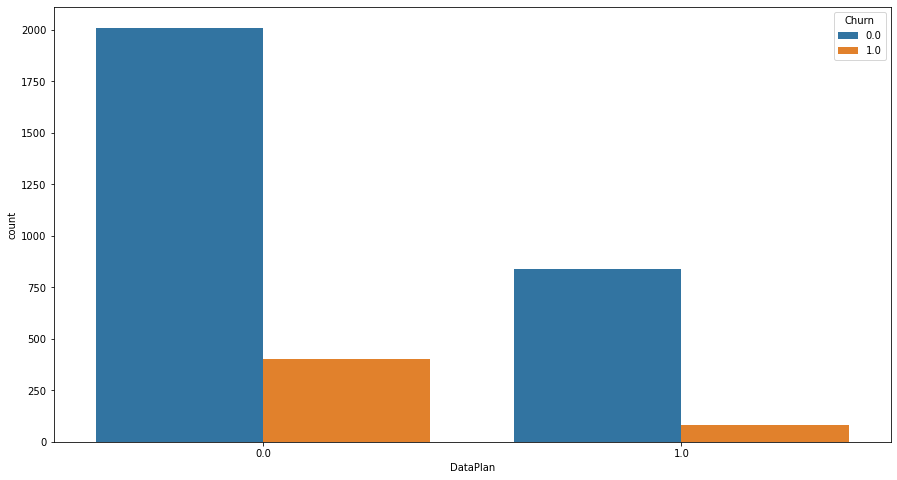

In [57]:
sns.countplot(cell_df['DataPlan'],hue=cell_df['Churn']);
# pd.crosstab(cell_df['DataPlan'],cell_df['Churn']).plot(kind='bar');

Very few people have opted for having a data plan. Almost one-fifth of the customers have churned irrespective of having a data plan nor not. There isn't any significant difference between churn and no churn here.

## Treating Outliers

In [32]:
cols=['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins'];

In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
for i in cols:
    
    lr,ur=remove_outlier(cell_df[i])
    print('Feature Name:', i)
    print('Lower Range :',lr,'\nUpper Range :',ur)
    cell_df[i]=np.where(cell_df[i]>ur,ur,cell_df[i])
    cell_df[i]=np.where(cell_df[i]<lr,lr,cell_df[i])

Feature Name: AccountWeeks
Lower Range : -5.5 
Upper Range : 206.5
Feature Name: DataUsage
Lower Range : -2.64 
Upper Range : 4.4
Feature Name: CustServCalls
Lower Range : -0.5 
Upper Range : 3.5
Feature Name: DayMins
Lower Range : 35.95 
Upper Range : 324.34999999999997
Feature Name: DayCalls
Lower Range : 46.5 
Upper Range : 154.5
Feature Name: MonthlyCharge
Lower Range : 13.5 
Upper Range : 97.5
Feature Name: OverageFee
Lower Range : 3.249999999999999 
Upper Range : 16.85
Feature Name: RoamMins
Lower Range : 3.1000000000000005 
Upper Range : 17.5


In [35]:
cell_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0,80.0,1.0,1.0,2.89,3.5,166.4,92.0,77.9,11.92,10.7
4,0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


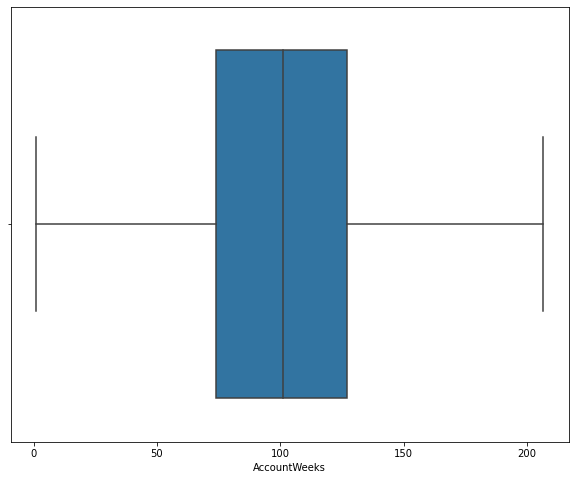

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


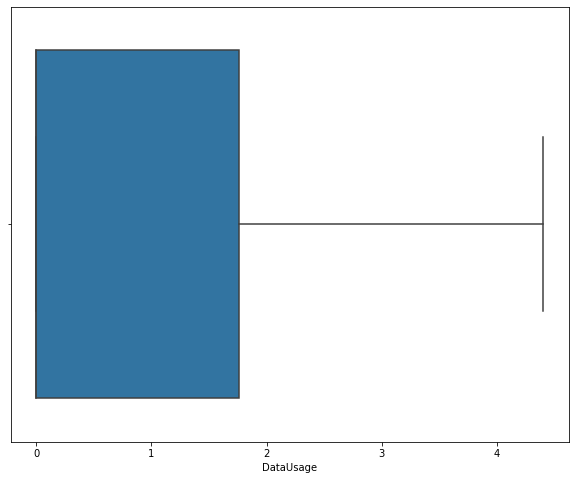

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


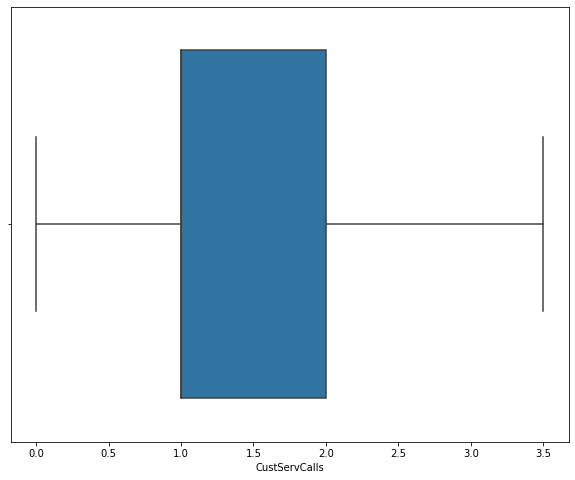

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


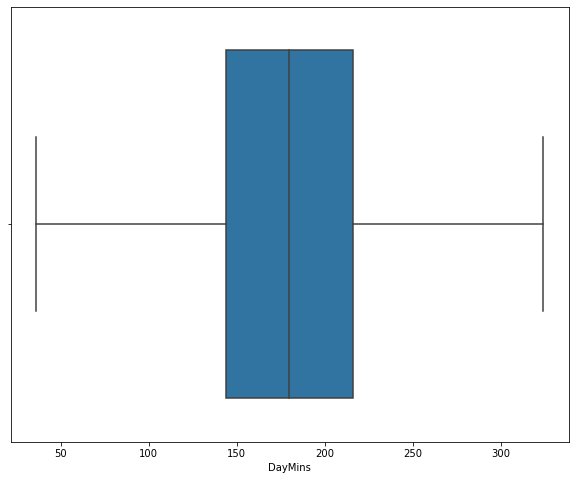

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


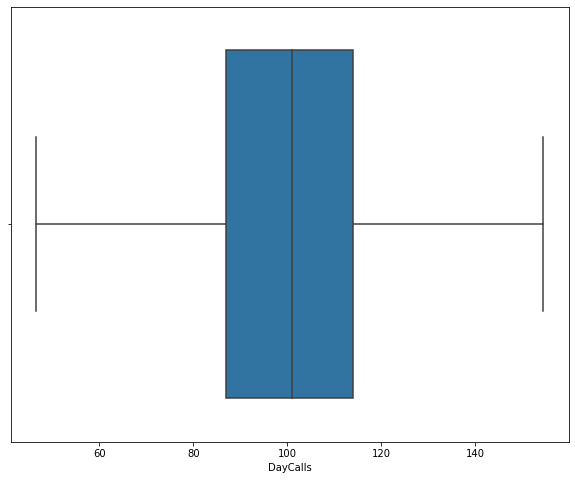

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


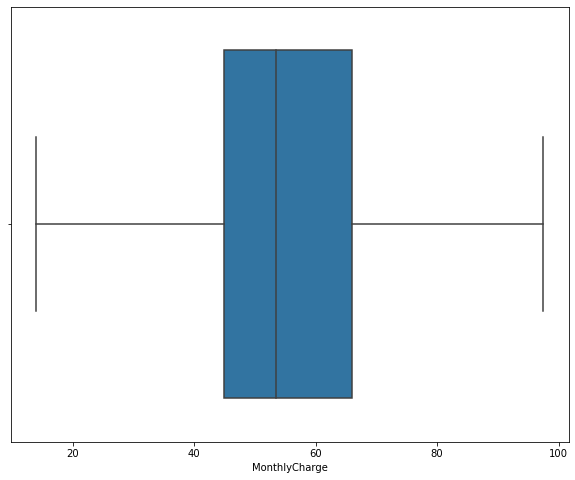

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


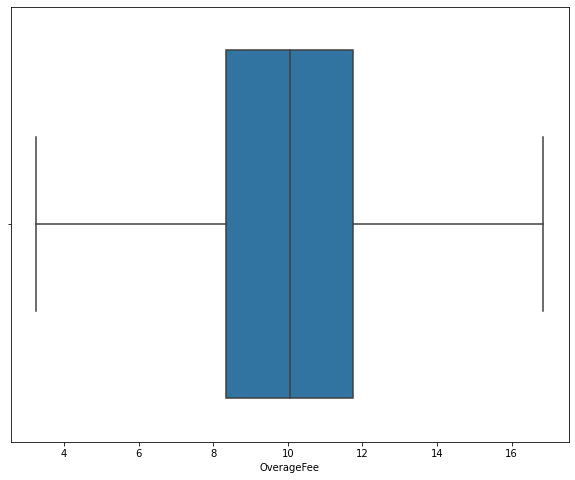

C:\Users\KAUSTHAB DUTTA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


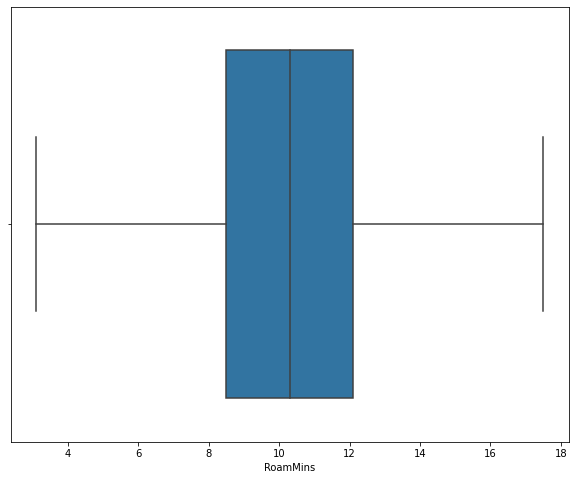

In [36]:
for i in cols:
    sns.boxplot(cell_df[i])
    plt.show()


### Train (70%) - Test (30%) Split

In [37]:
# Creating a copy of the original data frame
df = cell_df.copy()

In [38]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,1,108.0,0.0,0.0,0.38,2.0,115.1,114.0,41.8,10.57,13.8
1,0,113.0,1.0,1.0,3.59,1.0,44.9,63.0,55.9,6.71,13.3
2,0,101.0,1.0,0.0,0.00,0.0,257.3,84.0,60.0,9.24,13.5
3,0,80.0,1.0,1.0,2.89,3.5,166.4,92.0,77.9,11.92,10.7
4,0,70.0,1.0,0.0,0.00,0.0,175.4,130.0,44.0,7.98,11.6


In [39]:
X = df.drop('Churn',axis=1)
Y = df['Churn']

In [40]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [41]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (2333, 10)
Number of rows and columns of the training set for the dependent variable: (2333,)
Number of rows and columns of the test set for the independent variables: (1000, 10)
Number of rows and columns of the test set for the dependent variable: (1000,)


In [42]:
Y_train.value_counts(normalize=True)

0    0.855122
1    0.144878
Name: Churn, dtype: float64

In [43]:
Y_test.value_counts(normalize=True)

0    0.855
1    0.145
Name: Churn, dtype: float64

## Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### LDA Model

In [47]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

### Prediction

In [48]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

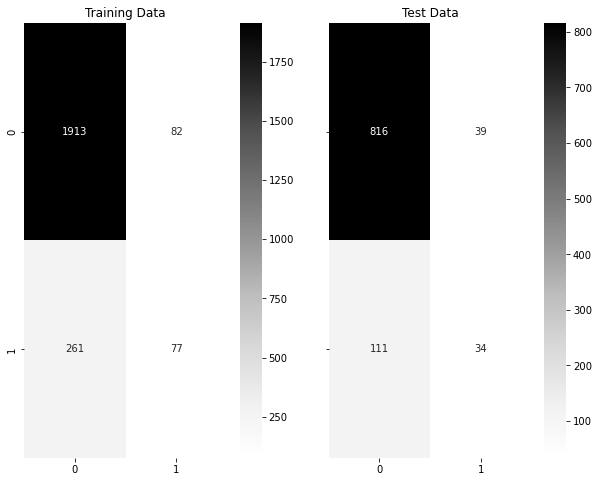

In [40]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison

In [41]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1995
         1.0       0.48      0.23      0.31       338

    accuracy                           0.85      2333
   macro avg       0.68      0.59      0.61      2333
weighted avg       0.82      0.85      0.83      2333
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.88      0.95      0.92       855
         1.0       0.47      0.23      0.31       145

    accuracy                           0.85      1000
   macro avg       0.67      0.59      0.61      1000
weighted avg       0.82      0.85      0.83      1000
 



### Probability prediction for the training and test data

In [52]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [57]:
pred_prob_train[:,1][2]

0.17803808416376166

In [140]:
pred_prob_train[:,1][2]

0.17803808416376166

AUC for the Training Data: 0.793
AUC for the Test Data: 0.807


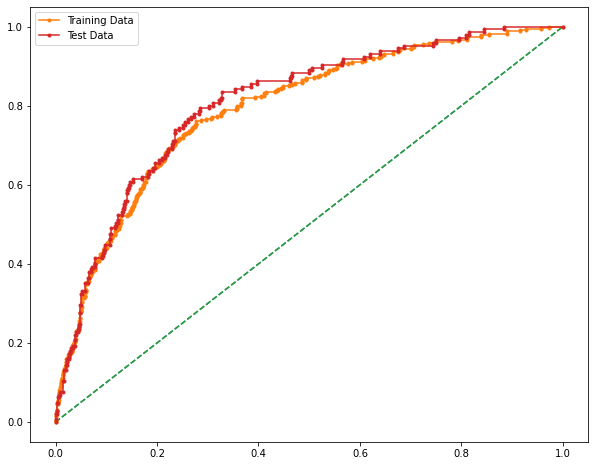

In [51]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Conclusion

The model accuracy on the training as well as the test set is about 85%, which is roughly the same proportion as the class 0 observations in the dataset. 
This model is affected by a class imbalance problem.
Since we only have 3333 observations, if re-build the same LDA model with more number of data points, an even better model could be built.  

Please do go ahead ad try to build other classification algorithms learnt so far in the course and compare the performances of those.

# How to change the cut-off values for maximum accuracy?

We will do this exercise only on the training data.

In [44]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('Recall Score',round(metrics.recall_score(Y_train,custom_cutoff_data),4))
    
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
#     plt.figure(figsize=(6,4))
#     print('Confusion Matrix')
#     sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
#     plt.show();

0.1 

Accuracy Score 0.6781
Recall Score 0.7899
F1 Score 0.4156 

0.2 

Accuracy Score 0.8093
Recall Score 0.5266
F1 Score 0.4444 

0.3 

Accuracy Score 0.8465
Recall Score 0.3846
F1 Score 0.4207 

0.4 

Accuracy Score 0.8538
Recall Score 0.2959
F1 Score 0.3697 

0.5 

Accuracy Score 0.853
Recall Score 0.2278
F1 Score 0.3099 

0.6 

Accuracy Score 0.8538
Recall Score 0.1746
F1 Score 0.2571 

0.7 

Accuracy Score 0.8598
Recall Score 0.1213
F1 Score 0.2005 

0.8 

Accuracy Score 0.859
Recall Score 0.0621
F1 Score 0.1132 

0.9 

Accuracy Score 0.8556
Recall Score 0.0059
F1 Score 0.0117 



In [143]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('Precision Score',round(metrics.precision_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
#     plt.figure(figsize=(6,4))
#     print('Confusion Matrix')
#     sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
#     plt.show();

0.1 

Accuracy Score 0.6781
Precision Score 0.2819
F1 Score 0.4156 

0.2 

Accuracy Score 0.8093
Precision Score 0.3844
F1 Score 0.4444 

0.3 

Accuracy Score 0.8465
Precision Score 0.4643
F1 Score 0.4207 

0.4 

Accuracy Score 0.8538
Precision Score 0.4926
F1 Score 0.3697 

0.5 

Accuracy Score 0.853
Precision Score 0.4843
F1 Score 0.3099 

0.6 

Accuracy Score 0.8538
Precision Score 0.4876
F1 Score 0.2571 

0.7 

Accuracy Score 0.8598
Precision Score 0.5775
F1 Score 0.2005 

0.8 

Accuracy Score 0.859
Precision Score 0.6364
F1 Score 0.1132 

0.9 

Accuracy Score 0.8556
Precision Score 0.6667
F1 Score 0.0117 



0.1 

Accuracy Score 0.6781
Recall Score 0.7899
F1 Score 0.4156 

Confusion Matrix


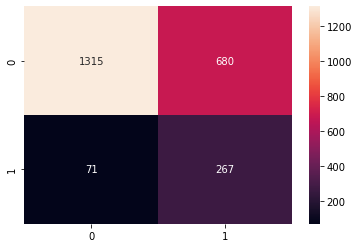

0.2 

Accuracy Score 0.8093
Recall Score 0.5266
F1 Score 0.4444 

Confusion Matrix


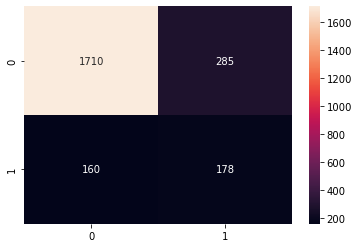

0.3 

Accuracy Score 0.8465
Recall Score 0.3846
F1 Score 0.4207 

Confusion Matrix


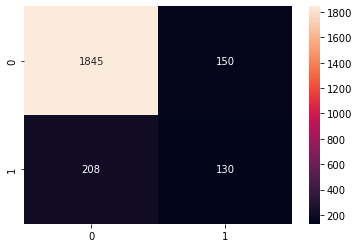

0.4 

Accuracy Score 0.8538
Recall Score 0.2959
F1 Score 0.3697 

Confusion Matrix


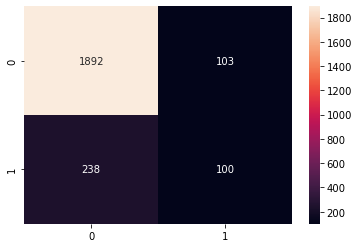

0.5 

Accuracy Score 0.853
Recall Score 0.2278
F1 Score 0.3099 

Confusion Matrix


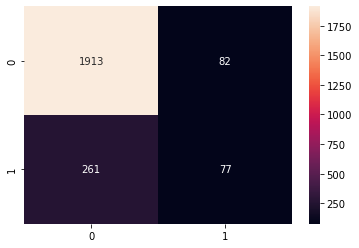

0.6 

Accuracy Score 0.8538
Recall Score 0.1746
F1 Score 0.2571 

Confusion Matrix


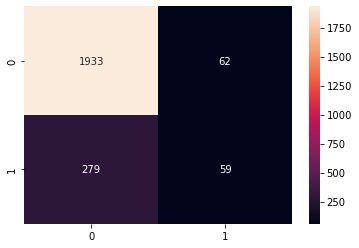

0.7 

Accuracy Score 0.8598
Recall Score 0.1213
F1 Score 0.2005 

Confusion Matrix


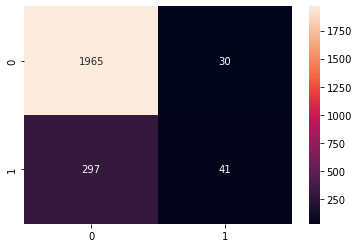

0.8 

Accuracy Score 0.859
Recall Score 0.0621
F1 Score 0.1132 

Confusion Matrix


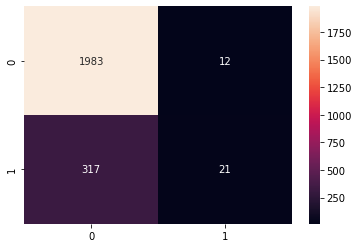

0.9 

Accuracy Score 0.8556
Recall Score 0.0059
F1 Score 0.0117 

Confusion Matrix


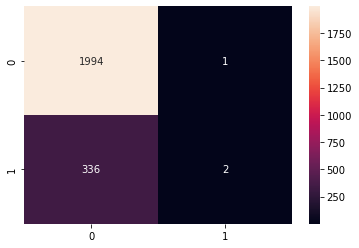

In [105]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('Recall Score',round(metrics.recall_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

We see that 0.7 and 0.8 gives better accuracy than the rest of the custom cut-off values. But 0.2 cut-off gives us the best 'f1-score'. Here, we will take the cut-off as 0.2 to get the optimum 'f1' score.

Let us evaluate the predictions of the test data using these cut-off values.

In [58]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.1:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

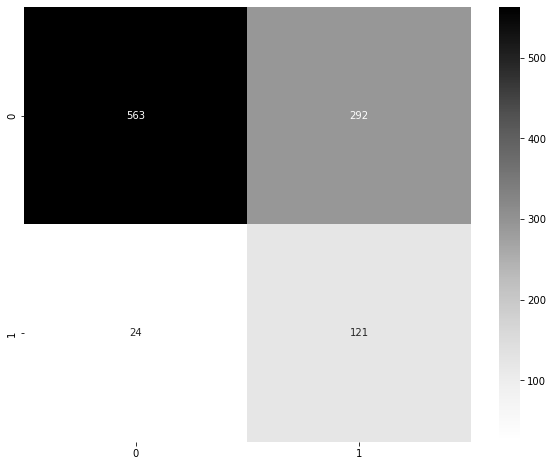

In [59]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [60]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.88      0.95      0.92       855
           1       0.47      0.23      0.31       145

    accuracy                           0.85      1000
   macro avg       0.67      0.59      0.61      1000
weighted avg       0.82      0.85      0.83      1000
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.96      0.66      0.78       855
           1       0.29      0.83      0.43       145

    accuracy                           0.68      1000
   macro avg       0.63      0.75      0.61      1000
weighted avg       0.86      0.68      0.73      1000
 



## Inferences


                                                                                               Note :

                                                         Precison : tells us how many predictions are actually positive
                                                         
                                                                    out of all the total positive predicted.
                                                         
                                                         Recall   : how many observations of positive class are actually 
                                                         
                                                                    predicted as positive. 

### Inferences using custom cut-off test data

For {Customer who didnot Churn (Label 0 )}:
   
   <b/>Precision (93%) – 93% of Customers who didnot Churn are correctly predicted ,out of all Customers who didnot Churn that    are predicted .</b>
   
   <b/>Recall (85%) – Out of all the Customers who actually didnot Churn , 85% of Customers who didnot Churn have been 
   predicted correctly .</b>
    
For {Customer who did Churn (Label 1 )}:
    
   <b/>Precision (40%) – 40% of Customers who did Churn are correctly predicted ,out of all Customers who did Churn that
   are predicted .</b>
   
   <b/>Recall (60%) – Out of all the Customers who actually did Churn , 60% of Customers who did Churn have been predicted   
   correctly .</b>
    

#### Overall accuracy of the model – 81 % of total predictions are correct

Accuracy, AUC, Precision and Recall for test data is almost inline with training data. 
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

# END